# Método de la Falsa Posición
## Búsqueda de raíces por interpolación lineal

In [14]:
# Celda 1: Importaciones
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Celda 2: Función objetivo (por defecto)
f = lambda x: x**3 - 2*x - 5
# Función ejemplo: x³ - 2x - 5, raíz aproximada ≈ 2.09455

In [16]:
# Celda 3: Implementación del método de falsa posición
def metodo_falsa_posicion(f, x0, x1, tol=1e-6, max_iter=100):
    # Validar que hay cambio de signo
    if f(x0) * f(x1) >= 0:
        raise ValueError("f(x0) y f(x1) deben tener signos opuestos")
    
    iteraciones, xn_vals, fxn_vals, errores = [], [], [], []
    xn_anterior = x0
    
    for i in range(max_iter):
        # Fórmula de la falsa posición
        xn = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        fxn = f(xn)
        error = abs(xn - xn_anterior) if i > 0 else abs(x1 - x0)
        
        iteraciones.append(i + 1)
        xn_vals.append(xn)
        fxn_vals.append(fxn)
        errores.append(error)
        
        if error < tol:
            break
            
        if f(x0) * fxn < 0:
            x1 = xn
        else:
            x0 = xn
            
        xn_anterior = xn
    
    tabla = pd.DataFrame({
        'Iteración': iteraciones,
        'x_n': np.round(xn_vals, 6),
        'f(x_n)': np.round(fxn_vals, 6),
        'Error_abs': np.round(errores, 6)
    })
    
    return xn, tabla, xn_vals

In [17]:
# Celda 4: Ejecución con caso por defecto
raiz, tabla, historial = metodo_falsa_posicion(f, 2, 3)

print(f"Raíz encontrada: x = {raiz:.6f}")
print(f"Valor de la función: f(x) = {f(raiz):.6f}")
print("\nTabla de iteraciones:")
print(tabla)

Raíz encontrada: x = 2.094551
Valor de la función: f(x) = -0.000003

Tabla de iteraciones:
    Iteración       x_n    f(x_n)  Error_abs
0           1  2.058824 -0.390800   1.000000
1           2  2.081264 -0.147204   0.022440
2           3  2.089639 -0.054677   0.008376
3           4  2.092740 -0.020203   0.003100
4           5  2.093884 -0.007451   0.001144
5           6  2.094305 -0.002746   0.000422
6           7  2.094461 -0.001012   0.000155
7           8  2.094518 -0.000373   0.000057
8           9  2.094539 -0.000137   0.000021
9          10  2.094547 -0.000051   0.000008
10         11  2.094550 -0.000019   0.000003
11         12  2.094551 -0.000007   0.000001
12         13  2.094551 -0.000003   0.000000


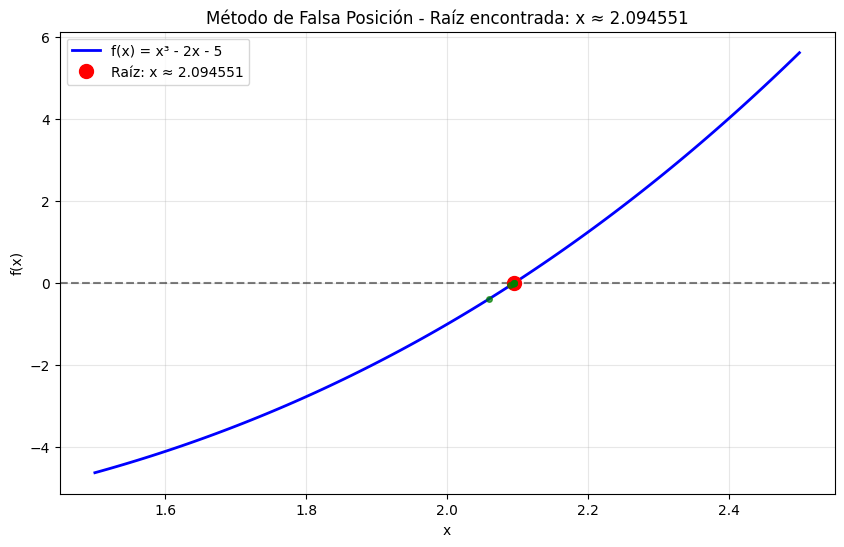

In [18]:
# Celda 5: Gráfica de la función y convergencia
x = np.linspace(1.5, 2.5, 100)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x³ - 2x - 5')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.plot(raiz, f(raiz), 'ro', markersize=10, label=f'Raíz: x ≈ {raiz:.6f}')

# Marcar puntos de iteración
for i, xn in enumerate(historial[::2]):  # Mostrar cada 2 iteraciones
    plt.plot(xn, f(xn), 'go', markersize=4, alpha=0.7)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Método de Falsa Posición - Raíz encontrada: x ≈ {raiz:.6f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

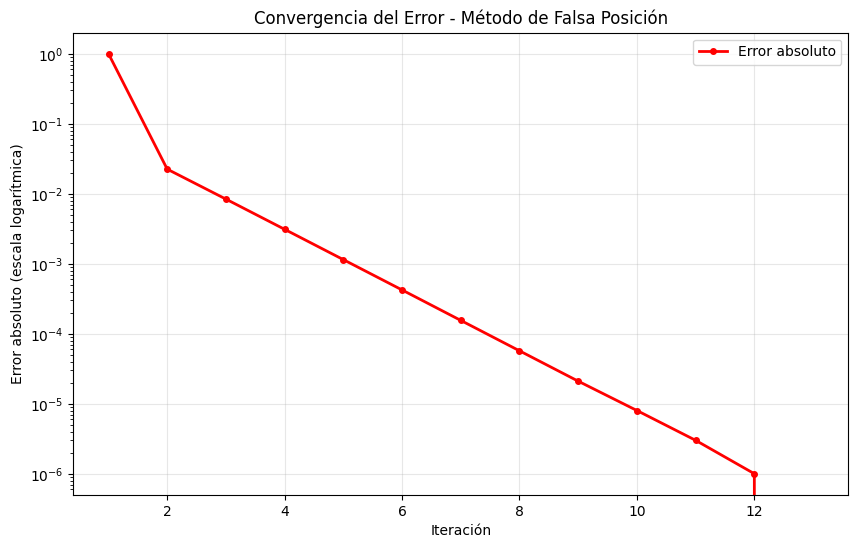

Error final: 0.00e+00
Tasa de convergencia promedio: -inf


C:\Users\wilmar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
# Celda 6: Gráfica de error de convergencia
plt.figure(figsize=(10, 6))
plt.semilogy(tabla['Iteración'], tabla['Error_abs'], 'r-o', linewidth=2, markersize=4, label='Error absoluto')
plt.xlabel('Iteración')
plt.ylabel('Error absoluto (escala logarítmica)')
plt.title('Convergencia del Error - Método de Falsa Posición')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Error final: {tabla['Error_abs'].iloc[-1]:.2e}")
print(f"Tasa de convergencia promedio: {np.mean(np.diff(np.log(tabla['Error_abs']))):.4f}")

In [20]:
# Celda 7: Interfaz interactiva simple
print("=== Método de Falsa Posición Interactivo ===")
print("Presiona Enter para usar valores por defecto")

# Obtener función del usuario
func_str = input("Ingresa la función (ej: x**2 - 4): ").strip()
if func_str:
    try:
        f_user = lambda x: eval(func_str)
        f_user(2)  # Validar que funciona
        f = f_user
        print(f"Usando función: {func_str}")
    except:
        print("Función inválida, usando por defecto: x³ - 2x - 5")

# Obtener intervalo
x0_str = input("Ingresa x0 (punto inicial): ").strip()
x1_str = input("Ingresa x1 (punto final): ").strip()

x0_user = float(x0_str) if x0_str else 2
x1_user = float(x1_str) if x1_str else 3

try:
    raiz_user, tabla_user, _ = metodo_falsa_posicion(f, x0_user, x1_user)
    print(f"\nRaíz encontrada: x = {raiz_user:.6f}")
    print(tabla_user.tail())
except Exception as e:
    print(f"Error: {e}")

=== Método de Falsa Posición Interactivo ===
Presiona Enter para usar valores por defecto

Raíz encontrada: x = 2.094551
    Iteración       x_n    f(x_n)  Error_abs
8           9  2.094539 -0.000137   0.000021
9          10  2.094547 -0.000051   0.000008
10         11  2.094550 -0.000019   0.000003
11         12  2.094551 -0.000007   0.000001
12         13  2.094551 -0.000003   0.000000
